In [1]:
with open("raw_data.txt", "r") as f:
    data = f.read()

In [2]:
len(data)

3330

1. Search for `\nConverged`. Get th index.
2. Four lines above that are original geometry.
3. Four lines below that are the final geometry.
4. Search for `Energy`.
5. The line below that is the energy.

In [3]:
i=0
position= data.find("\nConverged\n", i)
print("FINAL GEOMETRY:")
print("\n".join(data[position:].split("\n")[3:7]))
print("INITIAL GEOMETRY:")
print("\n".join(data[:position].split("\n")[-4:]))
e_position= data.find("\nEnergy\n", i)
print("ENERGY:")
print(data[e_position:].split("\n")[2])

FINAL GEOMETRY:
atom        -1.02195984       -0.04171919       -0.00000000  Co
atom         1.02195984       -0.04171915       -0.00000000  Co
atom        -0.00000003        2.07303559        0.00000002  Co
atom         0.00000003        4.01040275       -0.00000001  Zr
INITIAL GEOMETRY:
atom    -1      0       0       Co
atom    1       0       0       Co
atom    0       2       0       Co
atom    0       4       0       Zr
ENERGY:
-212991.530759


In [6]:
data.find("\nConverged\n", 3125)

-1

In [7]:
i = 0
i_geometries = []
f_geometries = []
energies = []
while i < len(data):
    print(i)
    position= data.find("\nConverged\n", i)
    if position == -1:
        break
    e_position= data.find("\nEnergy\n", i)
    f_geometry = "\n".join(data[position:].split("\n")[3:7])
    i_geometry = "\n".join(data[:position].split("\n")[-4:])
    energy = data[e_position:].split("\n")[2]

    i_geometries.append(i_geometry)
    f_geometries.append(f_geometry)
    energies.append(energy)
    i = position+10

0
325
775
1141
1507
2046
2498
3125


In [8]:
len(i_geometries), len(f_geometries), len(energies)

(7, 7, 7)

In [10]:
for g in f_geometries:
    print(g)
    print("FINAL")

atom        -1.02195984       -0.04171919       -0.00000000  Co
atom         1.02195984       -0.04171915       -0.00000000  Co
atom        -0.00000003        2.07303559        0.00000002  Co
atom         0.00000003        4.01040275       -0.00000001  Zr
FINAL
atom        -0.74415541       -0.35114249        0.00000005  Co
atom         0.97367750        0.82228537       -0.00000003  Zr
atom        -0.89607783        2.03889434       -0.00000006  Co
atom         0.66655574        3.48996277        0.00000004  Co
FINAL
atom        -0.28221476       -0.28221486       -0.28221486  Zr
atom         1.89849074        0.19186199        0.19186198  Co
atom         0.19186202        1.89849080        0.19186207  Co
atom         0.19186200        0.19186207        1.89849081  Co
FINAL
atom         0.00000001       -0.00000002       -0.16985336  Co
atom        -0.00000002        0.00000002        1.95213864  Co
atom         0.00000000        0.00000001        4.12362956  Zr
atom         0.0000000

In [91]:
import shelve
data_processed = shelve.open("data_processed")
data_processed["i_geometries"] = i_geometries
data_processed["f_geometries"] = f_geometries
data_processed["energies"] = energies
data_processed.close()

In [92]:
g1 = i_geometries[0]

In [94]:
g1 = g1.strip()

In [100]:
g1_list = g1.split(" ")

In [103]:
g1_cleaned = list(filter(lambda x: x!="", g1_list))

In [120]:
g1_cleaned = "\n".join(g1_cleaned).split("\n")

In [121]:
i=0
g = g1_cleaned[0:5]
for k in g:
    print(k.strip())

atom
-1
0
0
Co


In [144]:
gs= i_geometries[1]
gs = gs.strip()
gs_list = gs.split(" ")
gs_cleaned = list(filter(lambda x: x!="", gs_list))
gs_cleaned = "\n".join(gs_cleaned).split("\n")
gs_cleaned = "\t".join(gs_cleaned).split("\t")
gs_cleaned

['atom',
 '-1',
 '0',
 '0',
 'Co',
 'atom',
 '1',
 '0',
 '0',
 'Zr',
 'atom',
 '0',
 '2',
 '0',
 'Co',
 'atom',
 '0',
 '4',
 '0',
 'Co']

In [149]:
text = ""
j=0
for gs in i_geometries:
    print(j)
    gs = gs.strip()
    gs_list = gs.split(" ")
    gs_cleaned = list(filter(lambda x: x!="", gs_list))
    gs_cleaned = "\n".join(gs_cleaned).split("\n")
    gs_cleaned = "\t".join(gs_cleaned).split("\t")

    i=0
    text+=f"""<table class="table">
            <tbody>
<h3>Geometry {j+1}</h3>"""
    while i+5<=len(gs_cleaned):
        g = gs_cleaned[i:i+5]
        text+=f"""<tr>
    <td>{g[0].strip()}</td>
    <td>{g[1].strip()}</td>
    <td>{g[2].strip()}</td>
    <td>{g[3].strip()}</td>
    <td>{g[4].strip()}</td>
    </tr>"""
        i+=5
        print("I = ", i)
    text+=f"""</tbody>
</table>"""
    j+=1

0
I =  5
I =  10
I =  15
I =  20
1
I =  5
I =  10
I =  15
I =  20
2
I =  5
I =  10
I =  15
I =  20
3
I =  5
I =  10
I =  15
I =  20
4
I =  5
I =  10
I =  15
I =  20
5
I =  5
I =  10
I =  15
I =  20


In [150]:
print(text)

<table class="table">
            <tbody>
<h3>Geometry 1</h3><tr>
    <td>atom</td>
    <td>-1</td>
    <td>0</td>
    <td>0</td>
    <td>Co</td>
    </tr><tr>
    <td>atom</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>Co</td>
    </tr><tr>
    <td>atom</td>
    <td>0</td>
    <td>2</td>
    <td>0</td>
    <td>Co</td>
    </tr><tr>
    <td>atom</td>
    <td>0</td>
    <td>4</td>
    <td>0</td>
    <td>Zr</td>
    </tr></tbody>
</table><table class="table">
            <tbody>
<h3>Geometry 2</h3><tr>
    <td>atom</td>
    <td>-1</td>
    <td>0</td>
    <td>0</td>
    <td>Co</td>
    </tr><tr>
    <td>atom</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>Zr</td>
    </tr><tr>
    <td>atom</td>
    <td>0</td>
    <td>2</td>
    <td>0</td>
    <td>Co</td>
    </tr><tr>
    <td>atom</td>
    <td>0</td>
    <td>4</td>
    <td>0</td>
    <td>Co</td>
    </tr></tbody>
</table><table class="table">
            <tbody>
<h3>Geometry 3</h3><tr>
    <td>atom</td>
    <td>0</td>

In [11]:
def get_table(table):
    gs = table.strip()
    gs_list = gs.split(" ")
    gs_cleaned = list(filter(lambda x: x!="", gs_list))
    gs_cleaned = "\n".join(gs_cleaned).split("\n")
    gs_cleaned = "\t".join(gs_cleaned).split("\t")

    i=0
    text=f"""<table class="table table-striped table-dark">
    <tbody>"""
    while i+5<=len(gs_cleaned):
        g = gs_cleaned[i:i+5]
        text+=f"""<tr>
    <td>{g[0].strip()}</td>
    <td>{g[1].strip()}</td>
    <td>{g[2].strip()}</td>
    <td>{g[3].strip()}</td>
    <td><b>{g[4].strip()}</b></td>
    </tr>"""
        i+=5
    text+=f"""</tbody>
    </table>"""

    return text

In [13]:
import pyperclip
pyperclip.copy(get_table(f_geometries[6]))

In [173]:
print(get_table(i_geometries[5]))

<table class="table table-striped table-dark">
    <tbody><tr>
    <td>atom</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td><b>Co</b></td>
    </tr><tr>
    <td>atom</td>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td><b>Zr</b></td>
    </tr><tr>
    <td>atom</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td><b>Co</b></td>
    </tr><tr>
    <td>atom</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td><b>Co</b></td>
    </tr></tbody>
    </table>


In [168]:
energies[3]

'-212992.912984'

$$ E = E_{atomic} + 2\gamma\cos(ka)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

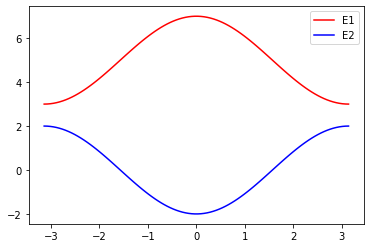

In [19]:
Eat1 = 5
Eat2 = 0
gamma1 = 1
gamma2 = -1
k = np.linspace(-np.pi, np.pi, 100)
E1 = Eat1 + 2*gamma1*np.cos(k)
E2 = Eat2 + 2*gamma2*np.cos(k)
plt.plot(k, E1, "r", label="E1")
plt.plot(k, E2, "b", label="E2")
plt.legend();